# Método de Euler

Jesús Octavio García Flores
(octubre 2020)

____

El método de Euler es un procedimiento de integración numérica para resolver ecuaciones diferenciales de primer orden a partir de un valor inicial dado. Es el más simple de los métodos numéricos.
Consiste en integrar la ecuacipon diferencial $$ y'(x) = f(x,y) $$ entre el punto $ ~x_i ~$ y el siguiente; es decir,
$$ \int_{x_i}^{x_{i+1}} y'(x) ~dx = \int_{x_i}^{x_{i+1}} f(x, y) ~dx $$

Integrando a la izquierda se obtiene $$ \left. y(x) \right|_{x_i}^{x_{i+1}} = \int_{x_i}^{x_{i+1}} f(x, y) ~dx $$

$$ y_{i+1} - y_i = \int_{x_i}^{x_{i+1}} f(x, y) ~dx $$

Para la parte de la derecha utilizaremos integración numérica. Suponemos entonce que si partimos el dominio de una función $~f(x)~$ en intervalos uniformes, entonces podemos aproximar a la función mediante un polinimio de Newton, considerando que el grado de éste puede ser hasta de n-1 (n datos). El método de Euler considera una aproximación de primer orden y además que la función sea "bien comportada" (pediremos que sea Lipschitz continua).
Aquí haremos una aproximación por un rectángulo, como se muestra en la siguiente figura, 

<img src="Euler_1.png" width="400">

de modo que obtenemos:

$$ \int_{x_i}^{x_{i+1}} f(x, y) ~dx = h f(x_i, y_i) + e_r$$

Sustituyendo llegamos a que

$$  y_{i+1} = y_i + h f(x_i, y_i) + e_r ,$$

donde $~e_r~$ es el error. Si lo despreciamos, entonces encontrammos la relación de recurrencia

$$  y_{i+1} = y_i + h f(x_i, y_i)$$

Esto nos permite hacer una aproximación a la solución, numéricamente hablando.

### Ejemplo

Resolver la ecuación diferencial $~ y'- 2xy = x ~$ con condicion inicial  $~ y(0.5)=1$, en el intervalo $~ 0.5 \leq x \leq 1.0$.

##### Solución

Si resolvemos la ecuación por separación de variables se obtiene que $y(x)= 1.16820 e^{x^2}-\frac{1}{2}$, cuya gráfica es:

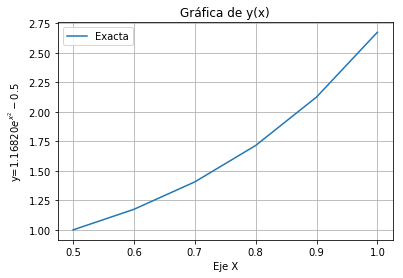

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_ = np.arange(0.5, 1.01, 0.1)
y_ = lambda x: 1.16820*np.exp(x**2) - 0.5  

plt.plot(x_, y_(x_), label="Exacta")
plt.title("Gráfica de y(x)")
plt.xlabel("Eje X")
plt.ylabel("y=$1.16820 e^{x^2}-0.5$")
plt.grid()
plt.legend()

plt.show()

En este caso 

$$~ f(x,y)=x+2xy.$$ 

Usando la fórmula de recurrencia para $~i=0~$ se tiene 

$$ y_1=y_0+ h f(x_0, y_0) $$

$y_0=1$ y $h$ se determina por el número de intervalos (n) a escoger. 

Hacemos $~h = \frac{x_n - x_0}{n} = \frac{1.0~ - ~0.5}{n} = \frac{1}{2n}$

Entonces $$f(x_0, y_0)=0.5 + 2(0.5)(1)=1.5$$

Sustituimos en $y_1$:

$$ y_1= 1 + 1.5 h = 1 + \frac{3}{4n} $$

Repetimos el proceso con $i=1$:

$$ y_2= y_1 + h f(x_1, y_1) $$

$$ y_2= 1 + \frac{3}{4n} + h f(x_1, y_1), $$

donde  $~ f(x_1, y_1)= x_1 + 2x_1 y_1 ~$ y $~ x_1=x_0 +h~$, por lo que

$$ y_2= 1 + \frac{3}{4n} + h \left[ x_1 + 2x_1 y_1 \right]$$

$$ y_2= 1 + \frac{3}{4n} + h \left[ x_0 +h + 2\left( x_0+h \right) y_1 \right]$$

Y así sucesivamente.

Pensemos en intervalos de longitud 0.1. Así las $~ y_{i+1}~$ son:

$$ y_1 = 1+1.5(0.1)=1.15 $$

$$ y_2 = y_1 + h f(x_1, y_1) = 1.15 + 0.1(1.98) = 1.348 $$

$$ y_3 = y_2 + h f(x_2, y_2) = 1.348 + 0.1(2.5872) = 1.60672 $$

$$ y_4 = y_3 + h f(x_3, y_3) = 1.60672 + 0.1(3.370752) = 1.9438 $$

### Algoritmo

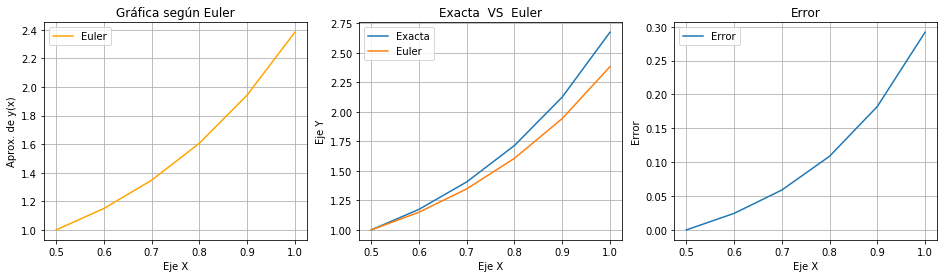

In [2]:
#PARÁMETROS:

x0 = 0.5
y0 = 1   # Condición Inicial
h = 0.1  # Tamaño de pasos
I = [0.5, 1.0]  # Intervalo de trabajo en x

f = lambda x,y: x+2*x*y        # Aquí definimos a y'
yi = lambda x,y: y + h*f(x,y)  # Calcula yi, respecto de y_{i-1}


# CALCULA EULER----------------------------------------------#
X = [x0]    #Puntos de la particiónb (se usarán para graficar las yi´s )
Y = [y0]
tam_interv = I[1]-I[0]
n = int(tam_interv/h)

for j in range(0,n):    #Calcula las yi´s de todos los intervalos y devuelve una lista con ellas.
    Y.append( yi(x0 + h*j, Y[j]) )
    X.append( x0 + h*(j+1) )


# CALCULA ERROR----------------------------------------------#
e1 = []
for i in range(0, len(Y)):
    e1.append( np.abs(y_(X[i]) - Y[i]) )
    
    
    
#------------------------------------------------------------#        
#GRÁFICAS

plt.figure(figsize=(16,4))

#APROXIMACIÓN
plt.subplot(131)
plt.plot(X, Y, label="Euler", color="orange")
plt.title("Gráfica según Euler")
plt.xlabel("Eje X")
plt.ylabel("Aprox. de y(x)")
plt.grid()
plt.legend()

#GRÁFICA EXACTA VS EULER
plt.subplot(132)
plt.plot(X, y_(np.array(X)), label="Exacta")
plt.plot(X, Y, label="Euler")
plt.title("Exacta  VS  Euler")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid()
plt.legend()


#GRÁFICA ERROR
plt.subplot(133)
plt.plot(X, e1, label="Error")
#plt.plot(X, Y, label="Euler")
plt.title("Error")
plt.xlabel("Eje X")
plt.ylabel("Error")
plt.grid()
plt.legend()


plt.show()

Conforme $~h~$ tiende a cero, la función debería aproximarse a $~y(x)~$ y el error también tenderá a cero:

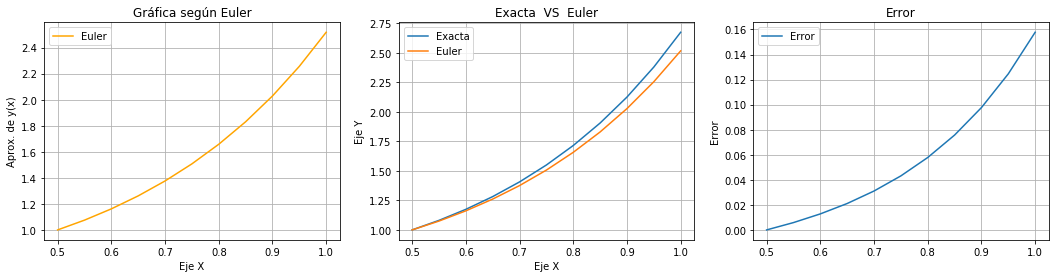

In [3]:

h = 0.05  # Tamaño de pasos reducido

# CALCULA EULER----------------------------------------------#
X = [x0]
Y = [y0]
tam_interv = I[1]-I[0]
n = int(tam_interv/h)

for j in range(0,n):    #Calcula las yi´s de todos los intervalos y devuelve una lista con ellas.
    Y.append( yi(x0 + h*j, Y[j]) )
    X.append( x0 + h*(j+1) )


# CALCULA ERROR----------------------------------------------#
e2 = []
for i in range(0, len(Y)):
    e2.append( np.abs(y_(X[i]) - Y[i]) )
    
    
    
#------------------------------------------------------------#        
#GRÁFICAS

plt.figure(figsize=(18,4))

#APROXIMACIÓN
plt.subplot(131)
plt.plot(X, Y, label="Euler", color="orange")
plt.title("Gráfica según Euler")
plt.xlabel("Eje X")
plt.ylabel("Aprox. de y(x)")
plt.grid()
plt.legend()

#GRÁFICA EXACTA VS EULER
plt.subplot(132)
plt.plot(X, y_(np.array(X)), label="Exacta")
plt.plot(X, Y, label="Euler")
plt.title("Exacta  VS  Euler")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid()
plt.legend()


#GRÁFICA ERROR
plt.subplot(133)
plt.plot(X, e2, label="Error")
#plt.plot(X, Y, label="Euler")
plt.title("Error")
plt.xlabel("")
plt.ylabel("Error")
plt.grid()
plt.legend()


plt.show()

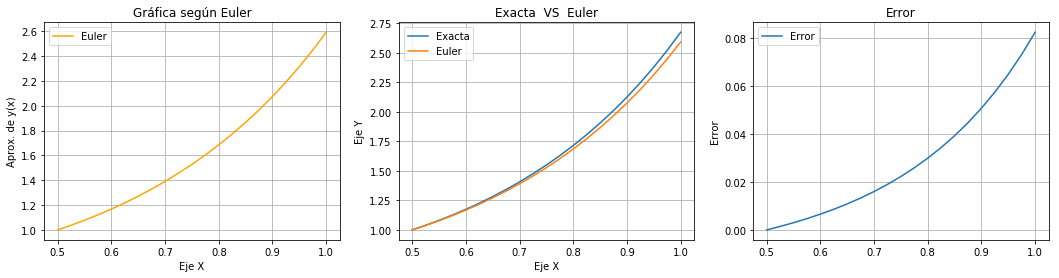

In [4]:
h = 0.025  # Tamaño de pasos reducido

# CALCULA EULER----------------------------------------------#
X = [x0]
Y = [y0]
tam_interv = I[1]-I[0]
n = int(tam_interv/h)

for j in range(0,n):    #Calcula las yi´s de todos los intervalos y devuelve una lista con ellas.
    Y.append( yi(x0 + h*j, Y[j]) )
    X.append( x0 + h*(j+1) )


# CALCULA ERROR----------------------------------------------#
e3 = []
for i in range(0, len(Y)):
    e3.append( np.abs(y_(X[i]) - Y[i]) )
    
    
    
#------------------------------------------------------------#        
#GRÁFICAS

plt.figure(figsize=(18,4))

#APROXIMACIÓN
plt.subplot(131)
plt.plot(X, Y, label="Euler", color="orange")
plt.title("Gráfica según Euler")
plt.xlabel("Eje X")
plt.ylabel("Aprox. de y(x)")
plt.grid()
plt.legend()

#GRÁFICA EXACTA VS EULER
plt.subplot(132)
plt.plot(X, y_(np.array(X)), label="Exacta")
plt.plot(X, Y, label="Euler")
plt.title("Exacta  VS  Euler")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid()
plt.legend()


#GRÁFICA ERROR
plt.subplot(133)
plt.plot(X, e3, label="Error")
#plt.plot(X, Y, label="Euler")
plt.title("Error")
plt.xlabel("")
plt.ylabel("Error")
plt.grid()
plt.legend()


plt.show()

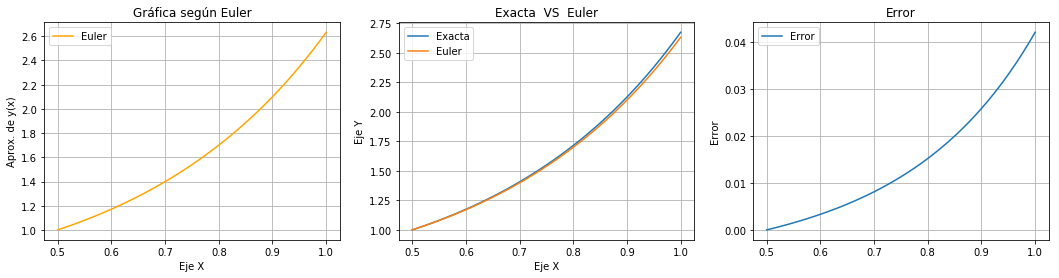

In [5]:
h = 0.0125  # Tamaño de pasos reducido

# CALCULA EULER----------------------------------------------#
X = [x0]
Y = [y0]
tam_interv = I[1]-I[0]
n = int(tam_interv/h)

for j in range(0,n):    #Calcula las yi´s de todos los intervalos y devuelve una lista con ellas.
    Y.append( yi(x0 + h*j, Y[j]) )
    X.append( x0 + h*(j+1) )


# CALCULA ERROR----------------------------------------------#
e4 = []
for i in range(0, len(Y)):
    e4.append( np.abs(y_(X[i]) - Y[i]) )
    
    
    
#------------------------------------------------------------#        
#GRÁFICAS

plt.figure(figsize=(18,4))

#APROXIMACIÓN
plt.subplot(131)
plt.plot(X, Y, label="Euler", color="orange")
plt.title("Gráfica según Euler")
plt.xlabel("Eje X")
plt.ylabel("Aprox. de y(x)")
plt.grid()
plt.legend()

#GRÁFICA EXACTA VS EULER
plt.subplot(132)
plt.plot(X, y_(np.array(X)), label="Exacta")
plt.plot(X, Y, label="Euler")
plt.title("Exacta  VS  Euler")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid()
plt.legend()


#GRÁFICA ERROR
plt.subplot(133)
plt.plot(X, e4, label="Error")
#plt.plot(X, Y, label="Euler")
plt.title("Error")
plt.xlabel("")
plt.ylabel("Error")
plt.grid()
plt.legend()


plt.show()

El error tiende a cero como se esperaba. Podemos notar que el error máximo en cada gráfica dsiminuye conforme disminuye el valor de $h$, por lo cual es directamente proporcional.

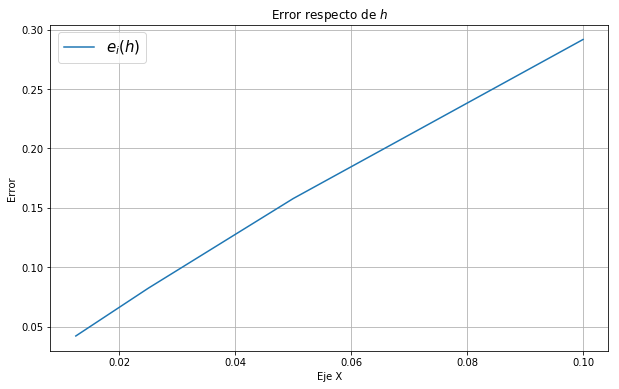

In [6]:
#GRÁFICA ERRORES VS h
plt.figure(figsize=(10,6))

h_s = [0.1, 0.05, 0.025, 0.0125]        #Valores de h
e_s = [e1[-1], e2[-1], e3[-1], e4[-1]]  #Errores máximos

plt.plot(h_s, e_s, label="$e_i(h)$")
plt.title("Error respecto de $h$")
plt.xlabel("Eje X")
plt.ylabel("Error")
plt.grid()
plt.legend(fontsize=15)


plt.show()

En esta última gráfica se observa la tendencia lineal del error respecto al cambio en h.

_____________________

## Reescribiendo el método dentro de una clase de Python e importándola (la llamé "euler_method") se simplifica la sintaxis en futuros cálculos.

In [32]:
import euler_method as em

In [33]:
#PARÁMETROS:

x0 = 0.5 #Primer punto de la partición
y0 = 1   # Condición Inicial
h  = 0.1  # Tamaño de pasos
I  = [0.5, 1.0]  # Intervalo de trabajo en x

f = lambda x,y: x+2*x*y        # Aquí definimos a y'
y = lambda x: 1.16820*np.exp(x**2) - 0.5

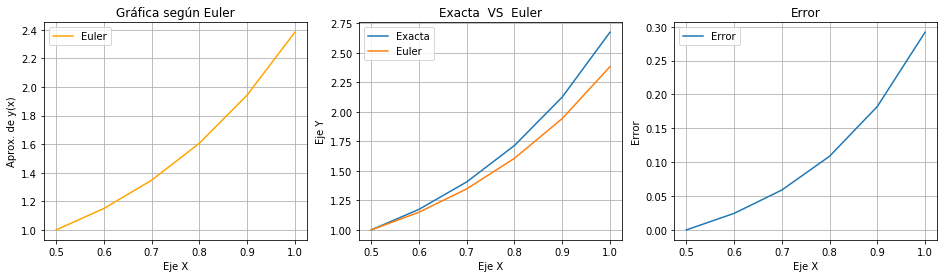

In [34]:
euler1 = em.Euler(x0, y0, f, y, I=[0.5, 1], h=0.1)
euler1.plot()

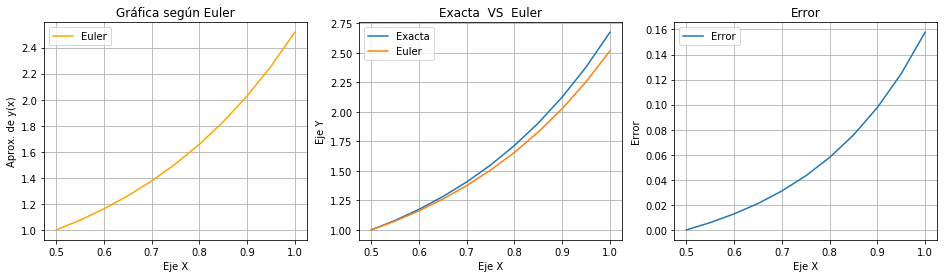

In [35]:
euler2 = em.Euler(x0, y0, f, y, I=[0.5, 1], h=0.05)
euler2.plot()

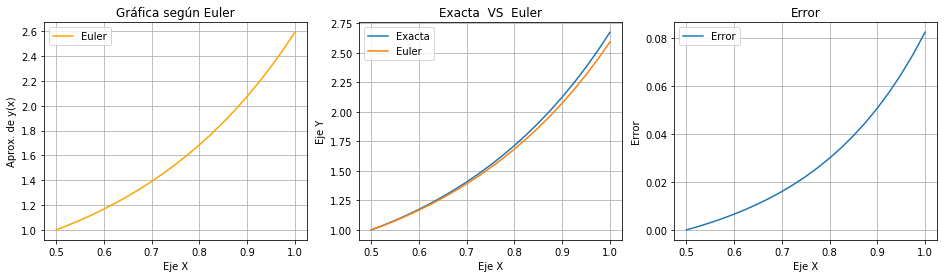

In [37]:
euler3 = em.Euler(x0, y0, f, y, I=[0.5, 1], h=0.025)
euler3.plot()

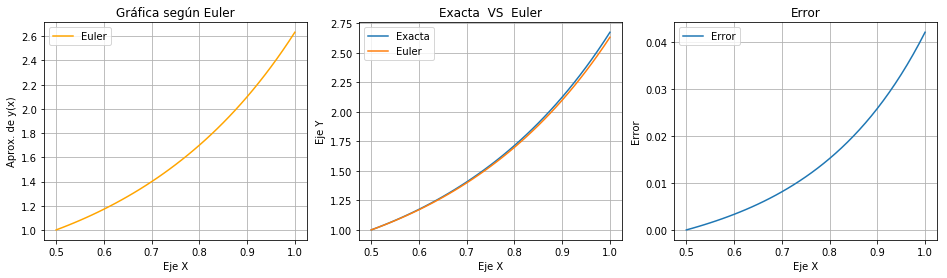

In [38]:
euler3 = em.Euler(x0, y0, f, y, I=[0.5, 1], h=0.0125)
euler3.plot()